In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

In [2]:
# create base url
base_url = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/global-shark-attack/records?limit=100'

In [3]:
# read base_url
requests.get(base_url)

<Response [200]>

In [4]:
# create list of #s for offet
total_count = requests.get(base_url).json()['total_count']

In [5]:
# hold the data
all_of_the_data = []

In [6]:
# loop through offsets to combine data into one dataframe
for currentOffset in np.arange(0,total_count,100):
  # print(currentOffset)
  cur_data = requests.get(f'{base_url}&offset={currentOffset}').json()['results']
  all_of_the_data.extend(cur_data) #extend is like
  time.sleep(0.5)

In [7]:
# check number of data points total in list of offsets
len(all_of_the_data)

6890

In [8]:
# create a dataframe from offset list
all_of_the_data_df = pd.DataFrame(all_of_the_data)
all_of_the_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
0,2023-05-13,2023,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,...,Y,10h10,White shark,"B. Myatt & S. De Marchi, GSAF",None,None,None,None,None,None
1,2023-04-29,2023,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,None,...,N,11h20,1m shark,"The West Austalian, 4/30/2023",None,None,None,None,None,None
2,2022-10-07,2022,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,...,N,11h30,Bull shark,"ABC,net, 10/07/2022",None,None,None,None,None,None
3,2021-10-04,2021,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,...,N,None,None,"K. McMurray, TrackingSharks.com",2021.10.04-VanPatrick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.04,2021.10.04,6711
4,2021-10-03,2021,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,None,...,N,12h00,None,"CBS12, 10/3/2021",2021.10.03.b-JensenBeach.pdf1,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.10.03.b,2021.10.04.b,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,None,None,Sea Disaster,GREECE,Off Thessaly,None,Shipwrecked Persian Fleet,males,M,None,...,Y,None,None,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,493BC-PersianFleet,493BC,128
6886,None,None,Unprovoked,INDONESIA,Riau Province,"Natuna Islands, between Sumatra & Kalimantan i...",Swimming near anchored ship,a ship's engineer,M,None,...,Y,None,None,"C.H. Townsend, p. 172; V.M. Coppleson, p.258",ND-0054-NatunaIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0054,ND.0054,52
6887,None,None,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,...,Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38
6888,None,None,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,None,...,Y,None,None,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0017-alongside-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0017,ND.0017,18


In [9]:
# Changed all None to nan and then dropped all nans
new_data_df = all_of_the_data_df.replace(to_replace='None', value=np.nan).dropna()
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14.0,...,N,16h00,5.5 ft shark,"K. McMurray, TrackingSharks.com",2021.05.01-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.03,2021.05.03,6656
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17.0,...,N,16h00,"Blacktip shark, 6' to 7'","K. McMurray, TrackingSharks.com",2020.10.31-OrmondBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.10.31,2020.10.31,6604
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60.0,...,N,11h30,White shark,"NZ Herald, 2/22/2020",2020.02.22-Minogue.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.02.22,2020.02.22,6527
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17.0,...,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com",2019.01.29-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.01.29,2019.01.29,6405
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31.0,...,N,10h25,Sharks averaged 1.8 m [6'] in length,"Evening Star (Washington D.C.), 7/7/1958, p. A...",1958.07.04.a-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.07.04.a,1958.07.04.a,2164
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14.0,...,N,16h30,6' shark,"V.M. Coppleson (1962), p.245",1958.01.19-Henderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.19,1958.01.19,2146
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22.0,...,N,14h00,Shark seen feeding on turtle scraps thrown ove...,"J.W. Robinson; V.M. Coppleson (1958), p.245; J...",1957.04.13-Nomoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.04.13,1957.04.13,2112
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8.0,...,N,18h00,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,2040


In [10]:
# checked data types
new_data_df.dtypes

date                      object
year                      object
type                      object
country                   object
area                      object
location                  object
activity                  object
name                      object
sex                       object
age                       object
injury                    object
fatal_y_n                 object
time                      object
species                   object
investigator_or_source    object
pdf                       object
href_formula              object
href                      object
case_number               object
case_number0              object
original_order            object
dtype: object

In [11]:
# change age from object to number
new_data_df['age'] = pd.to_numeric(all_of_the_data_df['age'], errors='coerce')
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14.0,...,N,16h00,5.5 ft shark,"K. McMurray, TrackingSharks.com",2021.05.01-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.03,2021.05.03,6656
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17.0,...,N,16h00,"Blacktip shark, 6' to 7'","K. McMurray, TrackingSharks.com",2020.10.31-OrmondBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.10.31,2020.10.31,6604
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60.0,...,N,11h30,White shark,"NZ Herald, 2/22/2020",2020.02.22-Minogue.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.02.22,2020.02.22,6527
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17.0,...,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com",2019.01.29-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.01.29,2019.01.29,6405
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31.0,...,N,10h25,Sharks averaged 1.8 m [6'] in length,"Evening Star (Washington D.C.), 7/7/1958, p. A...",1958.07.04.a-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.07.04.a,1958.07.04.a,2164
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14.0,...,N,16h30,6' shark,"V.M. Coppleson (1962), p.245",1958.01.19-Henderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.19,1958.01.19,2146
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22.0,...,N,14h00,Shark seen feeding on turtle scraps thrown ove...,"J.W. Robinson; V.M. Coppleson (1958), p.245; J...",1957.04.13-Nomoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.04.13,1957.04.13,2112
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8.0,...,N,18h00,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,2040


In [12]:
# change age from number to integer
new_data_df['age'] = new_data_df['age'].astype('Int64')
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,...,fatal_y_n,time,species,investigator_or_source,pdf,href_formula,href,case_number,case_number0,original_order
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,...,N,16h00,5.5 ft shark,"K. McMurray, TrackingSharks.com",2021.05.01-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.05.03,2021.05.03,6656
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,...,N,16h00,"Blacktip shark, 6' to 7'","K. McMurray, TrackingSharks.com",2020.10.31-OrmondBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.10.31,2020.10.31,6604
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,...,N,11h30,White shark,"NZ Herald, 2/22/2020",2020.02.22-Minogue.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.02.22,2020.02.22,6527
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,...,N,Evening,Reported as shark bite but injury caused by st...,"K. McMurray, TrackingSharks.com",2019.01.29-NZ.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.01.29,2019.01.29,6405
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,...,N,10h25,Sharks averaged 1.8 m [6'] in length,"Evening Star (Washington D.C.), 7/7/1958, p. A...",1958.07.04.a-Brown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.07.04.a,1958.07.04.a,2164
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,...,N,16h30,6' shark,"V.M. Coppleson (1962), p.245",1958.01.19-Henderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.19,1958.01.19,2146
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,...,N,14h00,Shark seen feeding on turtle scraps thrown ove...,"J.W. Robinson; V.M. Coppleson (1958), p.245; J...",1957.04.13-Nomoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1957.04.13,1957.04.13,2112
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,...,N,18h00,Wobbegong shark,"J. G. Davis; A.M. Rapson, pp.143 & 148",1955.11.16-NiuBodu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.11.16,1955.11.16,2040


In [13]:
# deleted unnecessary column
del new_data_df['investigator_or_source']

In [14]:
# deleted unnecessary column
del new_data_df['pdf']

In [15]:
# deleted unnecessary column
del new_data_df['href_formula']

In [16]:
# deleted unnecessary column
del new_data_df['href']

In [17]:
# deleted unnecessary column
del new_data_df['case_number']

In [18]:
# deleted unnecessary column
del new_data_df['case_number0']

In [19]:
# deleted unnecessary column
del new_data_df['original_order']

In [20]:
# reprint dataframe with removed columns
new_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,species
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,16h00,5.5 ft shark
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,16h00,"Blacktip shark, 6' to 7'"
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,11h30,White shark
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,10h25,Sharks averaged 1.8 m [6'] in length
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,16h30,6' shark
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,14h00,Shark seen feeding on turtle scraps thrown ove...
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,18h00,Wobbegong shark


In [21]:
# split text to columns on species and rename columns 
fixed_data_df = new_data_df.join(
     new_data_df['species'].str.split(',', expand=True).rename(
         columns={0:'Species_1', 1:'Species_2', 2:'Species_3',3:'Species_4'}
     )
 )

In [22]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,species,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,16h00,5.5 ft shark,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,16h00,"Blacktip shark, 6' to 7'",Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,11h30,White shark,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,10h25,Sharks averaged 1.8 m [6'] in length,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,16h30,6' shark,6' shark,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,14h00,Shark seen feeding on turtle scraps thrown ove...,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,18h00,Wobbegong shark,Wobbegong shark,None,None,None


In [23]:
# remove unnecessary column
del fixed_data_df['species']

In [24]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,time,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,16h00,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,16h00,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,11h30,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Evening,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,10h25,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,16h30,6' shark,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,14h00,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,18h00,Wobbegong shark,None,None,None


In [25]:
# remove unnecesary column
del fixed_data_df['time']

In [26]:
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,6' shark,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [27]:
# check species_1 column to see what unique values exist
species= fixed_data_df['Species_1'].unique()
species

array(['5.5 ft shark', 'Blacktip shark', 'White shark',
       'Reported as shark bite but injury caused by stingray',
       'Questionable', 'Wobbegong shark', '3 m shark',
       'Shark involvement not confirmed', 'Tiger shark', 'Bull shark',
       "8' to 10' shark", "2' to 3' shark", "3.5' to 4' shark",
       'Nurse shark', 'Tawny nurse shark', "6' shark",
       "8' white shark or 7-gill shark",
       'Reported by media as shark attack', 'A bull shark', '2 m shark',
       "3' shark", "6' to 8' shark", "6 m [20'] white shark",
       "A 2' shark was seen in the area by witnesses", 'juvenile shark',
       'Tiger shark?', "1.8 m [6'] shark",
       "4 m to 5 m [13' to 16.5']  white shark",
       "5 m to 6 m [16.5' to 20'] white shark", 'Lemon shark',
       '3.5 m white shark', "3 m to 5 m [10' to 16.5'] white shark",
       'Raggedtooth shark', "4 m to 5 m [13' to 16.5'] white shark",
       'Questionable incident', "14' shark",
       "3 m [10'] shark seen in vicinity", 'Possi

In [28]:
# look at value counts of species 1 to determine which values need to be cleaned/removed
fixed_data_df['Species_1'].value_counts().head(25)

Species_1
White shark                                           261
Tiger shark                                           136
Bull shark                                             73
4' shark                                               36
Bronze whaler shark                                    29
Blacktip shark                                         28
Raggedtooth shark                                      25
Shark involvement not confirmed                        25
4' to 5' shark                                         21
1.8 m [6'] shark                                       21
6' shark                                               19
Nurse shark                                            18
Invalid                                                16
3' shark                                               16
Mako shark                                             15
3' to 4' shark                                         15
Grey nurse shark                                       15
1.5 

In [29]:
# clean species_1
fixed_data_df['Species_1'] = fixed_data_df['Species_1'].replace({"4' shark": 'Unknown',"4' to 5' shark": 'Unknown',"1.8 m [6'] shark":'Unknown',
"6' shark":'Unknown',"Invalid":'Unknown',"3' shark": 'Unknown'})

In [30]:
# create a list of sharks
top_sharks = fixed_data_df['Species_1'].value_counts().head(10).keys().to_list()

In [31]:
# make an empty dataframe and create df list
top_shark_df = fixed_data_df.head(0).copy()
dfs = []

In [32]:
# create list of top shark dataframes
for shark in top_sharks:
    dfs.append(fixed_data_df.loc[fixed_data_df['Species_1'] == shark])

In [33]:
# combine dataframes
for df in dfs:
   top_shark_df= pd.concat([top_shark_df,df])

In [34]:
# view top 20 shark species
top_shark_df['Species_1'].value_counts().head(20)

Species_1
White shark                        261
Tiger shark                        136
Unknown                            131
Bull shark                          73
Bronze whaler shark                 29
Blacktip shark                      28
Raggedtooth shark                   25
Shark involvement not confirmed     25
Nurse shark                         18
Grey nurse shark                    15
Name: count, dtype: int64

In [35]:
# filter to white sharks only
fixed_data_df['Species_1'].loc[fixed_data_df['Species_1'] =='White shark' ]

13      White shark
22      White shark
24      White shark
37      White shark
45      White shark
           ...     
6679    White shark
6725    White shark
6797    White shark
6808    White shark
6844    White shark
Name: Species_1, Length: 261, dtype: object

In [36]:
# create list of top sharks
fixed_data_df['Species_1'].value_counts().head().keys().to_list()

['White shark', 'Tiger shark', 'Unknown', 'Bull shark', 'Bronze whaler shark']

In [37]:
# reprint dataframe
fixed_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [38]:
# drop row with incorrect date and reprint dataframe
clean_data_df = fixed_data_df.drop(fixed_data_df.index[808])
clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [39]:
#change date data type from object to date/time format
clean_data_df['date']=pd.to_datetime(clean_data_df['date'], format='%Y-%m-%d')

In [40]:
# verify datatypes to make sure date/time format is reflected
clean_data_df.dtypes

date         datetime64[ns]
year                 object
type                 object
country              object
area                 object
location             object
activity             object
name                 object
sex                  object
age                   Int64
injury               object
fatal_y_n            object
Species_1            object
Species_2            object
Species_3            object
Species_4            object
dtype: object

In [41]:
# reprint dataframe
clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1,Species_2,Species_3,Species_4
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark,None,None,None
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark,6' to 7',None,None
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark,None,None,None
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...,None,None,None
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length,None,None,None
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown,None,None,None
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...,None,None,None
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark,None,None,None


In [42]:
# look at count of species in list again
clean_data_df['Species_1'].value_counts().head(200)

Species_1
White shark                                      260
Tiger shark                                      136
Unknown                                          131
Bull shark                                        73
Bronze whaler shark                               29
                                                ... 
Possibly a 1' to 3' blacktip or spinner shark      1
14' to 16' white shark                             1
5.5 m [18'] shark                                  1
Bronze whaler or tiger shark                       1
43 shark                                           1
Name: count, Length: 200, dtype: int64

In [43]:
# remove unnecessary column
del clean_data_df['Species_2']

In [44]:
# remove unnecessary column
del clean_data_df['Species_3']

In [45]:
# remove unnecessary column
del clean_data_df['Species_4']

In [46]:
# reprint dataframe
clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
6,2021-05-03,2021,Unprovoked,USA,Hawaii,"Marine Corps Base, Oahu",Surfing,Parker Blanchette,M,14,Lacerations to shin and calf,N,5.5 ft shark
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark
19,2019-01-29,2019,Invalid,NEW ZEALAND,South Island,Oreti Beach,Boogie boarding,female,F,17,Gash to thigh,N,Reported as shark bite but injury caused by st...
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6816,1958-07-04,1958,Sea Disaster,PACIFIC OCEAN,Between Hawaii & Wake Island,600 miles northwest of Honolulu,U.S. Airforce C124 enroute from Hickham Air Ba...,"Captain Jonathan Brown, pilot",M,31,Left shoulder bitten,N,Sharks averaged 1.8 m [6'] in length
6817,1958-01-19,1958,Unprovoked,AUSTRALIA,New South Wales,Brunswick Heads,Body surfing,Brian Henderson,M,14,"Laceration to left ankle, heel and little toe",N,Unknown
6818,1957-04-13,1957,Unprovoked,AUSTRALIA,Torres Strait,"Thursday Island Harbour, Queensland",Swimming between anchored pearling luggers,Tuisafua Nomoa,M,22,"Left arm bitten, surgically amputated",N,Shark seen feeding on turtle scraps thrown ove...
6824,1955-11-16,1955,Unprovoked,PAPUA NEW GUINEA,Central Province,"Kalautu Village, Baibara at the mouth of Oibad...",Swimming,Niu Bodu,M,8,Right thigh bitten,N,Wobbegong shark


In [47]:
# review tail of dataframe
clean_data_df['Species_1'].value_counts().tail(10)

Species_1
Thought to involve a blacktip shark                                        1
Mako shark (tooth fragments recovered)                                     1
150-lb shark                                                               1
Small shark                                                                1
Though to involve a white shark                                            1
1.3 to 1.6 m shark                                                         1
6 m [20'] shark                                                            1
3'  shark                                                                  1
3.7 m to 4.3 m [12' to 14'] white shark                                    1
Shark seen feeding on turtle scraps thrown overboard prior to incident.    1
Name: count, dtype: int64

In [48]:
# create white shark dataframe
white_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='White shark' ]
white_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
13,2020-02-22,2020,Unprovoked,NEW ZEALAND,North Island,Pauanui Beach,Surfing,Nick Minogue,M,60,"Minor injury, surfboard bitten",N,White shark
22,2018-06-25,2018,Watercraft,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
24,2017-07-07,2017,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Reef, East London",Surfing,Zoe Stein,F,13,"No injury, shark bit surfboard",N,White shark
37,2015-07-02,2015,Unprovoked,AUSTRALIA,New South Wales,East Ballina,Body boarding,Matt Lee,M,32,Significant injuries to lower legs,N,White shark
45,2014-08-01,2014,Unprovoked,SOUTH AFRICA,Western Cape Province,Muizenberg,Surfing,Matthew Smithers,M,20,Lower limbs & thigh bitten,N,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,2015-07-03,2015,Unprovoked,AUSTRALIA,New South Wales,Lennox Head,Surfing,Michael Hoile,M,52,"No injury, shark bit surfboard",N,White shark
6725,2002-09-13,2002,Unprovoked,SOUTH AFRICA,Western Cape Province,"Glencairn, False Bay",Surf skiing,Paul Mauger (or Major),M,47,No injury,N,White shark
6797,1963-02-08,1963,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28,Left arm bitten,N,White shark
6808,1960-04-24,1960,Unprovoked,USA,California,"Tomales Point, Marin County",Free diving for abalone diving but at surface),Frank I. Gilbert,M,48,Foot & swim fin bitten,N,White shark


In [49]:
# create tiger shark dataframe
tiger_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Tiger shark' ]
tiger_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
36,2015-10-09,2015,Unprovoked,USA,Hawaii,"Leftovers, Oahu",Surfing,Colin Cook,M,25,"Left leg severed below the knee, defense injur...",N,Tiger shark
51,2013-06-18,2013,Unprovoked,USA,Hawaii,Kona Coast State Park,Swimming,James Kerrigan,M,28,Right thigh & calf bitten,N,Tiger shark
54,2013-03-12,2013,Unprovoked,JAMAICA,St. Catherine,Pillikin Red Light area,Spearfishing,George Facey,M,68,FATAL,Y,Tiger shark
84,2006-03-18,2006,Unprovoked,FIJI,Vitu Levu,Sigatoka,Surfing,Paul Sue,M,21,Lacerations to right hand,N,Tiger shark
94,2000-09-08,2000,Unprovoked,REUNION,Saint-Pierre,Pic du Diable,Surfing,Karim Maan,M,27,Left arm bitten,N,Tiger shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,2017-10-09,2017,Unprovoked,USA,Hawaii,"Davidsons Beach, Kekaha, Kauai",Surfing,Mitch Milan,M,54,Lacerations to left hand,N,Tiger shark
6739,1997-02-28,1997,Unprovoked,AUSTRALIA,Queensland,Whitsunday Passage,Scuba diving,Gerald Rauch,M,30,Left arm bitten,N,Tiger shark
6751,1992-11-05,1992,Unprovoked,USA,Hawaii,"Kea'au Beach Park, O'ahu",Body boarding,Aaron A. Romento,M,18,Right leg severely lacerated FATAL,Y,Tiger shark
6752,1992-10-22,1992,Unprovoked,USA,Hawaii,"Lanaikea, O'ahu",Surfing,Rick (Eric) Gruzinsky,M,28,"Chest & arm bruised & scratched, 15 crescent-s...",N,Tiger shark


In [50]:
# create unknown shark dataframe
unknown_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Unknown' ]
unknown_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
63,2011-08-31,2011,Unprovoked,USA,Florida,Crescent Beach St. Johns County,Surfing,Shane Lancaster,M,19,Lacerations to lower leg,N,Unknown
82,2007-08-25,2007,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Taylor Smith,M,27,6 lacerations to left hand,N,Unknown
104,1998-05-16,1998,Unprovoked,USA,Florida,"Pecks Lake, Martin County",Swimming,Janelle Dickinson,F,14,Ankle & foot bitten,N,Unknown
159,1964-09-07,1964,Unprovoked,TAIWAN,Northern Taiwan,Tamsui Beach,Swimming,LO Chiu-yang,M,20,Right thigh & elbow bitten,N,Unknown
168,1961-12-13,1961,Unprovoked,AUSTRALIA,Torres Strait,"Horn Island, near Thursday Island",Swimming with other crew near wharf,"George “Jimmy” Stevens, aborgine from the lugg...",M,17,Right thigh and leg lacerated,N,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,2011-01-31,2011,Unprovoked,MEXICO,Quintana Roo,Cancun,Swimming,Nicole Moore,F,38,"Leg, forearm & hand severely bitten",N,Unknown
6728,2001-09-24,2001,Provoked,USA,Florida,"Ponce Inlet, Volusia County","Surfing, fell off surfboard & stepped on the s...",male,M,21,PROVOKED INCIDENT Several small lacerations on...,N,Unknown
6733,1999-08-16,1999,Unprovoked,USA,South Carolina,"Grand Strand, Myrtle Beach, Horry County",Lying prone in 2' of water,Christopher (Will) Handley,M,10,"Ear lacerated, cuts on scalp, back, arm & shou...",N,Unknown
6770,1985-09-05,1985,Invalid,USA,Florida,"Fort Pierce Inlet, St Lucie County",Swimming,Jeff Justice,M,17,Found to be a hoax,UNKNOWN,Unknown


In [51]:
# create bull shark dataframe
bull_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Bull shark' ]
bull_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
39,2015-06-01,2015,Unprovoked,REUNION,Le Port,Folette,Surfing,Eddy Chaussalet,M,47,Left forearm bitten,N,Bull shark
68,2009-12-20,2009,Unprovoked,AUSTRALIA,Queensland,Lamont Reef,Spearfishing,John Pengelly,M,18,Lacerations to hand & forearm,N,Bull shark
262,2021-01-13,2021,Unprovoked,AUSTRALIA,Western Australia,Blackwall Reach,Swimming,Cameron Wrathall,M,54,Severe injury to leg and broken him,N,Bull shark
305,2011-06-28,2011,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Aliwal Shoal,Scuba diving,Paolo Stanchi,M,22,Severe lacerations to hands and left leg,N,Bull shark
516,2020-09-20,2020,Unprovoked,USA,Florida,"Sombero Key Light, Monroe County",Snorkeling,Andrew Charles Eddy,M,30,Severe bite to shoulder,N,Bull shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,2015-06-07,2015,Unprovoked,USA,Florida,"Lori Wilson Park, Cocoa Beach, Brevard County",Playing,Lucas Vertullo,M,11,Lacerations to right calf,N,Bull shark
6460,2008-06-26,2011,Unprovoked,USA,North Carolina,"North Topsail Beach, Onslow County",Playing in the surf,Cassidy Cartwright,F,10,Ankle bitten,N,Bull shark
6472,2008-04-26,2008,Unprovoked,NEW CALEDONIA,North Province,Poindimié,Swimming,Olivier Vilain,M,32,Lacerations to left foot,N,Bull shark
6690,2011-03-23,2011,Unprovoked,AUSTRALIA,New South Wales,Crowdy Head,Surfing,David Pearson,M,48,Severe injury to left forearm,N,Bull shark


In [52]:
# create bronze whaler shark dataframe
bronze_whaler_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Bronze whaler' ]
bronze_whaler_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
974,2022-08-31,2022,Unprovoked,AUSTRALIA,New South Wales,Avoca,Surfing,Sunni Pace,M,14,Puncture wounds to right hand & forearm,N,Bronze whaler
5808,1982-12-26,1982,Unprovoked,AUSTRALIA,New South Wales,Suffolk Park,Surfing,Paul Fletcher,M,27,"No injury, surfboard bitten",N,Bronze whaler


In [53]:
# create blacktip shark dataframe
blacktip_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Blacktip shark' ]
blacktip_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
10,2020-10-31,2020,Unprovoked,USA,Florida,Ormond Beach,Swimming,Jordan Hooper,M,17,Minor injuries,N,Blacktip shark
428,1962-09-30,1962,Unprovoked,BRITISH WEST INDIES,Grand Turk Island,Long Cay,Spearfishing,Wesley Vickrey,M,24,Left thigh & hand & speargun bitten,N,Blacktip shark
544,2014-10-05,2014,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Kevin Ross,M,29,Foot bitten,N,Blacktip shark
774,2016-05-18,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Swimming,Mark Wilson,M,48,Ankle bitten,N,Blacktip shark
976,2021-08-02,2021,Unprovoked,USA,Maryland,"Ocean City, Worcester County",Swimming,Jordan Prushinski,F,12,Lacerations and puncture wounds to lower left leg,N,Blacktip shark
1023,2013-02-10,2013,Unprovoked,USA,Florida,"Stuart Rocks, Martin County",Surfing,Cole Taschman,M,16,Lacerations to right hand,N,Blacktip shark
1067,2000-10-06,2000,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Austin White,M,23,Fingers lacerated,N,Blacktip shark
1166,1947-03-09,1947,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Country Club Beach, Durban",Treading water,"Gabriel Botha, a lifesaver",M,22,Lacerations on buttock & right foot,N,Blacktip shark
1230,2022-03-09,2022,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Fishing,male,M,21,M inor injuries to knee and calf of left leg ...,N,Blacktip shark
1314,2000-08-12,2000,Unprovoked,USA,Florida,"St. Augustine, St. Johns County",Standing,Margaret White,F,44,Severely bitten on lower leg,N,Blacktip shark


In [54]:
# create raggedtooh shark dataframe
raggedtooth_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Raggedtooth shark' ]
raggedtooth_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
137,1983-12-21,1983,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Nahoon,Swimming,Jack Heydenrych,M,47,Shin lacerated,N,Raggedtooth shark
334,2006-04-09,2006,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Body boarding,Stuart Duffie,M,15,Leg bitten,N,Raggedtooth shark
390,1986-02-06,1986,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Spearfishing,Michael Taljaard,M,29,2 punctures in upper arm,N,Raggedtooth shark
628,1983-04-12,1983,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Bonza Bay,Fishing,Peter S. Venter,M,27,Puncture wounds to foot,N,Raggedtooth shark
1041,2006-12-06,2006,Provoked,SOUTH AFRICA,KwaZulu-Natal,Cape Vidal,Fishing,Peter Willoughby,M,25,"Hand, thigh & calf bitten by hooked shark PROV...",N,Raggedtooth shark
1114,1981-05-20,1981,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Nahoon,Surfing,Mark Jury,M,27,"Shark & board collided. No injury, but board w...",N,Raggedtooth shark
1262,2015-01-03,2015,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Chintsa East Beach,Surfing,Jason Krafft,M,15,"Lacerations to lower left leg, puncture wounds...",N,Raggedtooth shark
1353,1984-01-05,1984,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Port Alfred,Swimming,Robert Tennent,M,14,Foot bitten,N,Raggedtooth shark
1358,1981-05-10,1981,Unprovoked,SOUTH AFRICA,Eastern Cape Province,King’s Beach,Surfing,John Dunser,M,19,"No Injury, board bitten",N,Raggedtooth shark
1879,1932-01-01,1932,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Kowie River Mouth, Port Alfred",Collecting fish by lamplight in gully,Manning Samuels,M,23,"Right shin, calf and sole of foot lacerated",N,Raggedtooth shark


In [55]:
#create nurse shark dataframe
nurse_shark_df = clean_data_df.loc[clean_data_df['Species_1'] =='Nurse shark' ]
nurse_shark_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
59,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
349,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39,Arm bitten,N,Nurse shark
822,2002-08-11,2002,Unprovoked,USA,Florida,"Vero Beach, Indian River County",Surfing,Brad Milliken,M,15,Lacerations on heel & dorsum of right foot,N,Nurse shark
1489,2018-11-09,2018,Unprovoked,BAHAMAS,Exumas,Compass Cay,Swimming,Asher Jones,M,8,Arc of shallow lacerations to back,N,Nurse shark
1755,2009-07-04,2009,Provoked,USA,Florida,"Biscayne National Park, Miami",Swimming,Carmen Dominguez,F,43,Thigh injured by hooked shark PROVOKED INCIDENT,N,Nurse shark
2077,1969-05-24,1969,Provoked,USA,Florida,Sarasota County,Diving,Brian Martel,M,23,Laceration to buttocks Recorded as PROVOKED IN...,N,Nurse shark
2114,1958-06-26,1958,Provoked,USA,Florida,"Sanibel Island, Lee County",Wading,Eric Napier Cockerill,M,59,Right foot bitten when he walked into shark's ...,N,Nurse shark
2855,1967-08-07,1967,Unprovoked,USA,Florida,Near Key West,Spearfishing,Donald Ritter,M,15,Shark grasped thigh,N,Nurse shark
2971,2013-07-28,2013,Unprovoked,BAHAMAS,Exuma Islands,Compass Cay,Cleaning fish,male,M,64,Bitten on left hand,N,Nurse shark
3091,1967-06-13,1967,Provoked,USA,Florida,"Key West, Monroe County",Spearfishing,Andres Puma (or Pruna),M,26,"After shark was speared & hit on head, it bit ...",N,Nurse shark


In [56]:
# combine different shark dataframes together
shark_clean_data_df = pd.concat([nurse_shark_df, raggedtooth_shark_df, blacktip_shark_df, bronze_whaler_shark_df,bull_shark_df, unknown_shark_df, 
tiger_shark_df,white_shark_df], ignore_index=True)

In [57]:
# print new clean shark dataframe
shark_clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
0,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
1,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39,Arm bitten,N,Nurse shark
2,2002-08-11,2002,Unprovoked,USA,Florida,"Vero Beach, Indian River County",Surfing,Brad Milliken,M,15,Lacerations on heel & dorsum of right foot,N,Nurse shark
3,2018-11-09,2018,Unprovoked,BAHAMAS,Exumas,Compass Cay,Swimming,Asher Jones,M,8,Arc of shallow lacerations to back,N,Nurse shark
4,2009-07-04,2009,Provoked,USA,Florida,"Biscayne National Park, Miami",Swimming,Carmen Dominguez,F,43,Thigh injured by hooked shark PROVOKED INCIDENT,N,Nurse shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2015-07-03,2015,Unprovoked,AUSTRALIA,New South Wales,Lennox Head,Surfing,Michael Hoile,M,52,"No injury, shark bit surfboard",N,White shark
669,2002-09-13,2002,Unprovoked,SOUTH AFRICA,Western Cape Province,"Glencairn, False Bay",Surf skiing,Paul Mauger (or Major),M,47,No injury,N,White shark
670,1963-02-08,1963,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28,Left arm bitten,N,White shark
671,1960-04-24,1960,Unprovoked,USA,California,"Tomales Point, Marin County",Free diving for abalone diving but at surface),Frank I. Gilbert,M,48,Foot & swim fin bitten,N,White shark


<Axes: title={'center': 'Which Shark Species Are Most Involved'}>

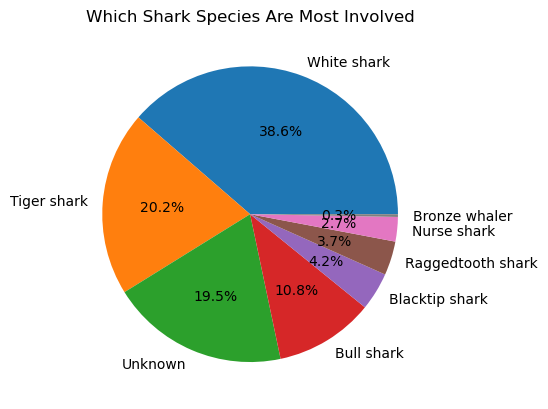

In [58]:
deadliest_sharks_df = shark_clean_data_df["Species_1"].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.title("Which Shark Species Are Most Involved")
deadliest_sharks_df

Text(0.5, 1.0, 'Do Shark Attacks Leave Severe Injuries')

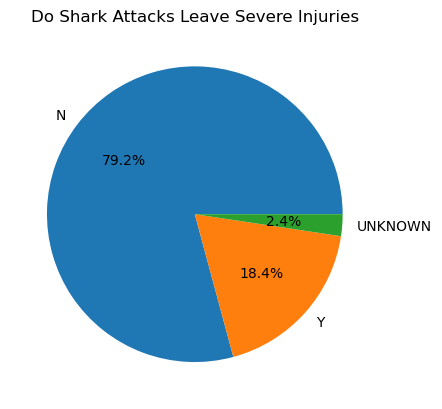

In [59]:
shark_clean_data_df["fatal_y_n"].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.title("Do Shark Attacks Leave Severe Injuries")

In [60]:
activity_df = shark_clean_data_df[['activity']]

In [61]:
activity_df

,activity
0,Fishing
1,Snorkeling
2,Surfing
3,Swimming
4,Swimming
...,...
668,Surfing
669,Surf skiing
670,Spearfishing
671,Free diving for abalone diving but at surface)


In [62]:
activity_df.value_counts()

activity                                                              
Surfing                                                                   195
Swimming                                                                  107
Spearfishing                                                               56
Body boarding                                                              19
Fishing                                                                    19
                                                                         ... 
Free diving for abalone (surfacing)                                         1
Free diving / spearfishing, from paddleboard & floating on the surface      1
Free diving / spearfishing (resting on the surface)                         1
Free diving / spearfishing                                                  1
Windsurfing, but sitting on his board                                       1
Name: count, Length: 143, dtype: int64

In [63]:
activity_df = activity_df = activity_df.replace({"Free diving for abalone (surfacing)": 'Spearfishing',
"Free diving / spearfishing, from paddleboard & floating on the surface": 'Spearfishing',
"Free diving / spearfishing (resting on the surface)":'Spearfishing',
"Free diving / spearfishing":'Spearfishing'})

In [64]:
activity_df.value_counts()

activity                                      
Surfing                                           195
Swimming                                          107
Spearfishing                                       60
Body boarding                                      19
Fishing                                            19
                                                 ... 
Free diving with seals                              1
Free diving or wading back to shore                 1
Free diving for abalone diving but at surface)      1
Free diving (but on surface)                        1
Windsurfing, but sitting on his board               1
Name: count, Length: 139, dtype: int64

In [65]:
activity_df = activity_df = activity_df.replace({"Free diving with seals ": 'Free Diving',
"Free diving or wading back to shore": 'Free Diving',
"Free diving for abalone diving but at surface)": 'Free Diving',
"Free diving (but on surface)":'Free Diving',
"Windsurfing, but sitting on his board":'Windsurfing'})

In [66]:
activity_df.value_counts()

activity                                                                               
Surfing                                                                                    195
Swimming                                                                                   107
Spearfishing                                                                                60
Fishing                                                                                     19
Body boarding                                                                               19
                                                                                          ... 
Abalone diving using Hookah (near calving whales)                                            1
Diving into water                                                                            1
Picking opihi                                                                                1
Paddling rescue ski                                      

In [67]:
activity_df = activity_df = activity_df.replace({"Abalone diving using Hookah (near calving whales)": 'Other',
"Diving into water ": 'Free Diving',
"Picking opihi ": 'Other',
"Paddling rescue ski":'Other',
"14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water":'Other'})

In [68]:
activity_df .value_counts()

activity                  
Surfing                       195
Swimming                      107
Spearfishing                   60
Fishing                        19
Body boarding                  19
                             ... 
Rolled off raft                 1
Riding floatation device        1
Bathing in knee-deep water      1
Dog paddling or standing        1
Playing in the water            1
Name: count, Length: 134, dtype: int64

In [69]:
activity_df = activity_df = activity_df.replace({"Rolled off raft": 'Other',
"Riding floatation device": 'Other',
"Bathing in knee-deep water": 'Other',
"Dog paddling or standing":'Other',
"Playing in the water":'Other'})

In [70]:
activity_df.value_counts()

activity                                                                             
Surfing                                                                                  195
Swimming                                                                                 107
Spearfishing                                                                              60
Body boarding                                                                             19
Fishing                                                                                   19
                                                                                        ... 
Diving, but on the surface when bitten by the shark                                        1
Rowing                                                                                     1
Dress diving, filming shark & pulling it through the water for a motion picture scene      1
Fishing - 'tag & release'                                                    

In [71]:
activity_df = activity_df = activity_df.replace({"Diving, but on the surface when bitten by the shark": 'Free Diving',
"Rowing": 'Other',
"Dress diving, filming shark & pulling it through the water for a motion picture scene": 'Other',
"Fishing - 'tag & release'":'Fishing',
"Spearfishing / free diving ":'Spearfishing'})

In [72]:
activity_df.value_counts()

activity                                           
Surfing                                                195
Swimming                                               107
Spearfishing                                            60
Fishing                                                 20
Body boarding                                           19
                                                      ... 
Scallop diving (using surface-supplied air & a POD)      1
Sailing on catamaran & fell into the water               1
SUP Foil boarding                                        1
Fishing / standing in waist deep water                   1
Spearfishing, dived to pick up a float line              1
Name: count, Length: 125, dtype: int64

In [73]:
activity_df = activity_df = activity_df.replace({"Scallop diving (using surface-supplied air & a POD)": 'Free Diving',
"Sailing on catamaran & fell into the water": 'Other',
"SUP Foil boarding": 'Other',
"Fishing / standing in waist deep water":'Fishing',
"Spearfishing, dived to pick up a float line":'Spearfishing'})

In [74]:
activity_df.value_counts()

activity                                                               
Surfing                                                                    195
Swimming                                                                   107
Spearfishing                                                                61
Fishing                                                                     21
Body boarding                                                               19
                                                                          ... 
Diving from the lugger San, operated by the Protector of the Aborigines      1
Diving into water                                                            1
Scallop diving on hookah                                                     1
Fishing for sharks                                                           1
Spearfishing, pulled shark’s tail                                            1
Name: count, Length: 120, dtype: int64

In [75]:
activity_df = activity_df = activity_df.replace({"Diving into water": 'Free Diving',
"Scallop diving on hookah": 'Free Diving',
"Sailing": 'Other',
"Fishing for sharks":'Fishing',
"Spearfishing, holding mesh bag with speared fish":'Spearfishing'})

In [76]:
activity_df.value_counts()

activity                                                               
Surfing                                                                    195
Swimming                                                                   107
Spearfishing                                                                62
Fishing                                                                     22
Body boarding                                                               19
                                                                          ... 
Diving for trochus                                                           1
Scuba diving & spearfishing                                                  1
Diving from the lugger San, operated by the Protector of the Aborigines      1
Fishing from a kayak                                                         1
Diving for Abalone                                                           1
Name: count, Length: 116, dtype: int64

In [77]:
activity_df = activity_df = activity_df.replace({"Diving for trochus": 'Free Diving',
"Scuba diving & spearfishing": 'Spearfishing',
"Diving from the lugger San, operated by the Protector of the Aborigines": 'Free Diving',
"Fishing from a kayak":'Fishing',
"Diving for Abalone":'Free Diving'})

In [78]:
activity_df.value_counts()

activity                                                        
Surfing                                                             195
Swimming                                                            107
Spearfishing                                                         63
Fishing                                                              23
Body boarding                                                        19
                                                                   ... 
Spearfishing, had fish on his spear                                   1
Spearfishing, pulled shark’s tail                                     1
Splashing                                                             1
Dived overboard to check propeller of US Navy motor torpedo boat      1
Standing / Snorkeling                                                 1
Name: count, Length: 111, dtype: int64

In [79]:
activity_df = activity_df = activity_df.replace({"Spearfishing, pulled shark’s tail": 'Spearfishing',
"Spearfishing, had fish on his spear": 'Spearfishing',
"Splashing": 'Free Diving',
"Dived overboard to check propeller of US Navy motor torpedo boat":'Free Diving',
"Standing / Snorkeling":'Snorkeling'})

In [80]:
activity_df.value_counts()

activity                                                                             
Surfing                                                                                  195
Swimming                                                                                 107
Spearfishing                                                                              65
Fishing                                                                                   23
Body boarding                                                                             19
                                                                                        ... 
Spearfishing / free diving                                                                 1
Spearfishing with Scuba gear                                                               1
Standing in waist-deep water, helping his father tend a gill net containing dead fish      1
Kite Boarding                                                                

In [81]:
activity_df = activity_df = activity_df.replace({"Spearfishing / free diving": 'Spearfishing',
"Spearfishing with Scuba gear": 'Spearfishing',
"Standing in waist-deep water, helping his father tend a gill net containing dead fish": 'Other',
"Surf fishing in waist-deep water ":'Fishing',
"Kite Boarding":'Other'})

In [82]:
activity_df.value_counts().tail(60)

activity                                                                                                
Boogie Boarding                                                                                             2
Swimming / Body Surfing                                                                                     1
Swimming near pier                                                                                          1
Body-boarding                                                                                               1
Swimming breast stoke                                                                                       1
Casting a net                                                                                               1
Swimming /  boogie boarding                                                                                 1
Surfing with dolphins                                                                                       1
Surfing, paddli

In [83]:
activity_df = activity_df = activity_df.replace({
"Cleaning hull of ship": 'Other',
"Surf fishing in waist-deep water": 'Fishing',
"Diving for abalone (Hookah, submerged)": 'Free Diving',
"Diving for abalone (Scuba)":'Free Diving',
"Diving for abaone (Scuba, but at surface)":'Free Diving',
"Swimming / Body Surfing":"Swimming",
"Swimming near pier":"Swimming",
"Body-boarding":"Body boarding",
"Swimming breast stoke":"Swimming",
"Casting a net":"Other",
"Swimming /  boogie boarding":"Swimming",
"Surfing with dolphins":"Surfing",
"Surfing, paddling seawards":"Surfing",
"Surfing, lying on surfboard":"Surfing",
"Surfing, fell off surfboard & stepped on the shark.":"Surfing",
"Swimming or Snorkeling":"Swimming",
"Swimming underwater from crayfish cage to a fishing bait":"Swimming",
"Swimming with dolphins":"Swimming",
"Swimming with other crew near wharf":"Swimming",
"Body surfing / treading water":"Body boarding",
"Swimming, naked":"Swimming",
"Swimming, poaching perlemoen":"Swimming",
"Swimming. Passer-by, Len Bedford, heard him shriek , saw shark leap from the water & swimmer disappeared":"Swimming",
"Teasing a shark":"Other",
"Thrashing the water / imitating the shark victim from Jaws":"Other",
"Body surfing & treading water":"Body boarding",
"Body boarding or surfing":"Body boarding",
"Wading / fishing & carrying a bag of fish":"Other",
"Wading in school of baitfish":"Other",
"Body Surfing":"Body boarding",
"Walking on reef":"Other",                                                                                             
"Water-skiing":"Other",
"Surfing, but treading water":"Surfing",
"Killing a shark":"Other",
"Surfing on air mattress":"Other",
"Cleaning fish":"Other",
"Kite surfing":"Other",
"Kiteboarding":"Other",
"Lifesaving drill":"Other",
"Lifesaving exhibition":"Other",
"Lying on surfboard":"Other",
"Lying prone in 2' of water":"Other",
"Night bathing":"Other",
"Kayak Fishing":"Fishing",
"Hand feeding sharks":"Other",
"Paddling":"Other",
"Paddling on surfboard":"Other",
"Picking opihi":"Other",
"Free diving, Spearfishing":"Spearfishing",
"Free diving with seals":"Free Diving",
"Free diving & spearfishing (ascending)":"Spearfishing",
"Free diving & spearfishing":"Spearfishing",
"Floating on his back":"Other",
"Floating in inflatable pool ring": "Other",
"Scuba diving (submerged riding a scooter)":"Free Diving",                                                                   
"Shark fishing": "Fishing",
"Fishing with hand net in 2' of water": "Fishing",                                                                     
"Spearfishing (Free diving)": "Spearfishing"
})

In [84]:
activity_df.value_counts()

activity                                        
Surfing                                             200
Swimming                                            118
Spearfishing                                         71
Other                                                38
Fishing                                              27
Body boarding                                        24
Free Diving                                          17
Snorkeling                                           16
Standing                                             16
Wading                                               16
Kayaking                                             11
Scuba diving                                         10
Diving                                                9
Body surfing                                          9
Treading water                                        9
Free diving                                           8
Boogie boarding                                       7

In [85]:
activity_df = activity_df = activity_df.replace({
"Scuba diving":"Free Diving",
"Diving":"Free Diving",
"Body surfing":"Body Boarding",
"Treading water":"Swimming",
"Free diving":"Free Diving",
"Boogie boarding":"Body Boarding",
"Surf-skiing":"Other",
"Surf skiing":"Other",
"Walking":"Other",
"Free diving for abalone":"Free Diving",
"Body Boarding":"Body Boarding",
"Windsurfing":"Windsurfing",
"Paddle boarding":"Other",
"Stand-Up Paddleboarding":"Other",
"Swimming / snorkeling":"Swimming",
"Spearfishing / Scuba diving (at surface)":"Spearfishing",
"Swimming from the New Venture":"Swimming",
"Swimming, ducking for shells in water 0.9 m deep":"Swimming",
"Bathing":"Other",
"Spearfishing / Scuba diving":"Spearfishing",
"Spearfishing (free diving)":"Spearfishing",
"Scuba diving (but on surface)":"Free Diving",
"Scuba Diving":"Free Diving",
"Playing in the surf":"Other",
"Playing":"Other",
"Kite Surfing":"Other",
"Kayaking / Fishing":"Kayaking",
"Floating":"Other",
"Diving for abalone (Hookah)":"Free Diving",
"Diving for abalone":"Free Diving",
"Boogie Boarding":"Body Boarding",
"SUP":"Other",          
"Collecting fish by lamplight in gully":"Fishing"               
})

In [86]:
activity_df.value_counts()

activity     
Surfing          200
Swimming         133
Spearfishing      77
Other             70
Free Diving       56
Fishing           28
Body boarding     24
Body Boarding     21
Snorkeling        16
Standing          16
Wading            16
Kayaking          13
Windsurfing        3
Name: count, dtype: int64

In [87]:
activity_df = activity_df = activity_df.replace({"Body boarding":"Body Boarding"})

In [88]:
activity_df.value_counts()

activity     
Surfing          200
Swimming         133
Spearfishing      77
Other             70
Free Diving       56
Body Boarding     45
Fishing           28
Snorkeling        16
Standing          16
Wading            16
Kayaking          13
Windsurfing        3
Name: count, dtype: int64

In [89]:
activity_list = ['Surfing','Swimming','Spearfishing','Other','Free Diving','Body Boarding','Fishing','Snorkeling','Standing',
'Wading','Kayaking','Windsurfing']
attack_number_list = [200,133,77,70,56,45,28,16,16,16,13,3]

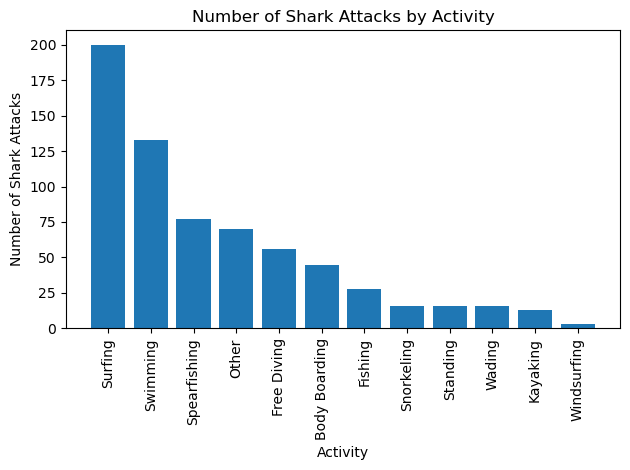

In [90]:
plt.bar(activity_list,attack_number_list)
plt.xticks(activity_list, rotation="vertical")
plt.xlabel("Activity")
plt.ylabel("Number of Shark Attacks")
plt.title("Number of Shark Attacks by Activity")
plt.tight_layout()

In [91]:
activity_type_df = shark_clean_data_df[['type','activity']]
activity_type_df = activity_type_df.replace(to_replace='Watercraft', value=np.nan).dropna()
activity_type_df.value_counts()

type        activity                                 
Unprovoked  Surfing                                      189
            Swimming                                     103
            Spearfishing                                  49
            Body boarding                                 19
            Standing                                      16
                                                        ... 
            Diving for trochus                             1
            Diving for abaone (Scuba, but at surface)      1
            Diving for abalone (Scuba)                     1
            Diving for abalone (Hookah, submerged)         1
            Windsurfing, but sitting on his board          1
Name: count, Length: 156, dtype: int64

In [92]:
activity_type_df = activity_type_df.replace(to_replace='Invalid', value=np.nan).dropna()
activity_type_df

,type,activity
0,Provoked,Fishing
1,Unprovoked,Snorkeling
2,Unprovoked,Surfing
3,Unprovoked,Swimming
4,Provoked,Swimming
...,...,...
668,Unprovoked,Surfing
669,Unprovoked,Surf skiing
670,Unprovoked,Spearfishing
671,Unprovoked,Free diving for abalone diving but at surface)


Text(0, 0.5, '')

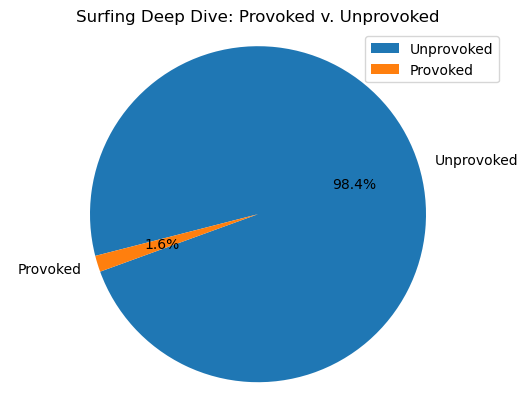

In [93]:
revised_activity_type_df = activity_type_df.set_index(['activity'])
value_counts_df = revised_activity_type_df.loc['Surfing'].value_counts()
index = ['Unprovoked', 'Provoked']
value_counts_df.plot(kind='pie',x='type',labels = index,autopct = "%1.1f%%",startangle= 200)
plt.title('Surfing Deep Dive: Provoked v. Unprovoked')
plt.axis("equal")
plt.legend()
plt.ylabel("")

In [94]:
shark_clean_data_df

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_y_n,Species_1
0,2012-06-15,2012,Provoked,USA,Florida,"Summerland Key, Monroe County",Fishing,male,M,23,Superficial injury to calf by hooked shark PRO...,N,Nurse shark
1,2002-03-15,2002,Unprovoked,USA,Florida,"Deerfield Beach (near Boca Raton), Broward County",Snorkeling,Robert Land,M,39,Arm bitten,N,Nurse shark
2,2002-08-11,2002,Unprovoked,USA,Florida,"Vero Beach, Indian River County",Surfing,Brad Milliken,M,15,Lacerations on heel & dorsum of right foot,N,Nurse shark
3,2018-11-09,2018,Unprovoked,BAHAMAS,Exumas,Compass Cay,Swimming,Asher Jones,M,8,Arc of shallow lacerations to back,N,Nurse shark
4,2009-07-04,2009,Provoked,USA,Florida,"Biscayne National Park, Miami",Swimming,Carmen Dominguez,F,43,Thigh injured by hooked shark PROVOKED INCIDENT,N,Nurse shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2015-07-03,2015,Unprovoked,AUSTRALIA,New South Wales,Lennox Head,Surfing,Michael Hoile,M,52,"No injury, shark bit surfboard",N,White shark
669,2002-09-13,2002,Unprovoked,SOUTH AFRICA,Western Cape Province,"Glencairn, False Bay",Surf skiing,Paul Mauger (or Major),M,47,No injury,N,White shark
670,1963-02-08,1963,Unprovoked,FIJI,Lomaiviti Island Group,"Taibaisa Passage, Gau Island",Spearfishing,Jone Waiteatei,M,28,Left arm bitten,N,White shark
671,1960-04-24,1960,Unprovoked,USA,California,"Tomales Point, Marin County",Free diving for abalone diving but at surface),Frank I. Gilbert,M,48,Foot & swim fin bitten,N,White shark
